# Declaration of Originality

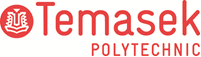

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Shanza Eiliyah Binte Mohamed Sahrom
* Tutorial Group                : PC05
* Tutor						    : 
* Submission Date               : 10/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

## **1️⃣ Business Understanding**

**Goal:** Explain the real-world problem and why ML is useful.

What you must include (A-grade):

* What is the **business problem**?
* Who are the **users / stakeholders**?
* What is the **impact** if the problem is solved?

**Example (Medical Charges Project):**

> The business problem is to estimate a patient’s expected medical insurance charges before treatment. This is important for insurance companies to set appropriate premiums and for individuals to plan their healthcare expenses. Accurate predictions can reduce financial risk for insurers and improve transparency for patients.

✅ Examiner wants to see:
You are not just predicting numbers — you understand **business value**.

---

## **2️⃣ Data Understanding**

**Goal:** Show you understand your dataset and target variable.

What to include:

* Dataset source
* Number of rows and columns
* What is the **target variable**
* Whether this is **regression or classification**
* Brief description of key features

**Example:**

> The dataset was obtained from Kaggle and contains over 1,300 records with features such as age, BMI, smoking status, number of children, and region. The target variable is medical charges, which is a continuous value, hence this is a regression problem.

---

## **3️⃣ Exploratory Data Analysis (EDA)**

**Goal:** Understand patterns, distributions, and relationships.

What to include for A-grade:

* Distribution of target
* Relationship between target and key features
* Correlation / feature importance
* Clear interpretation:

  * trends
  * outliers
  * modelling implications

**Example explanation:**

> The distribution of medical charges is right-skewed, with a small number of patients incurring very high costs. This suggests that models may struggle with large errors, and motivates the use of robust metrics such as MAE and RMSE. Smokers show significantly higher charges than non-smokers, indicating smoking status is a key predictive feature.

---

## **4️⃣ Data Preprocessing**

**Goal:** Prepare clean, ML-ready data.

What to include:

* Handling missing values (even if none, say so)
* Encoding categorical variables
* Feature scaling (if applicable)
* Train-test split
* Leakage prevention (pipelines)

**Example:**

> Categorical variables such as sex and region were one-hot encoded. Numeric features were standardised where required. A pipeline was used to ensure that preprocessing steps are learned only from the training data, preventing data leakage into the test set.

---

## **5️⃣ Baseline Modelling**

**Goal:** Create a simple reference point.

What to include:

* One simple model (e.g., Linear Regression)
* Baseline metric values
* Short reflection: why this baseline is limited

**Example:**

> A linear regression model was used as the baseline. While it provides interpretability, it assumes linear relationships and performed хуже than tree-based models, indicating that non-linear patterns exist in the data.

---

## **6️⃣ Iterative Model Development & Comparison**

**Goal:** Show experimentation and learning.

What to include:

* Train 2 or more different models
* Compare performance using metrics
* Short pros/cons of each model
* Select best model with justification

**Example:**

> Random Forest outperformed Linear Regression and Decision Tree in terms of MAE and RMSE, suggesting better ability to model non-linear interactions. Although less interpretable than linear regression, its performance makes it more suitable for deployment in this use case.

---

## **7️⃣ Feature Engineering / Feature Selection**

**Goal:** Improve the model using smarter features.

What to include:

* What you changed
* Why it makes sense (business + data reasoning)
* Show before vs after performance

**Example:**

> Interaction features between smoking status and age/BMI were introduced to capture the increased medical risk for older smokers. This resulted in a reduction in MAE, indicating improved predictive performance.

---

## **8️⃣ Hyperparameter Tuning**

**Goal:** Optimise the selected model.

What to include:

* Which hyperparameters were tuned
* Why they matter
* Comparison of tuned vs untuned model

**Example:**

> RandomizedSearchCV was used to tune max_depth and min_samples_leaf of the Random Forest model. The tuned model achieved lower MAE compared to the default model, indicating improved generalisation performance.

---

## **9️⃣ Model Evaluation**

**Goal:** Link metrics to business meaning.

What to include:

* Final metrics on test set
* Why this metric is suitable
* What the numbers mean in real life

**Example:**

> MAE was selected as the primary metric as it represents the average prediction error in dollars, which is intuitive for stakeholders. An MAE of $2,500 means that on average, predictions deviate from actual charges by $2,500, which may be acceptable for preliminary cost estimation but not for final billing.

---

## **🔟 Deployment (Streamlit App)**

**Goal:** Show your model works in the real world.

What to include:

* How user inputs data
* What output is shown
* Error handling
* Why the UI suits the target user

**Example:**

> The Streamlit web app allows users to input patient information such as age, BMI, and smoking status to obtain an estimated medical charge. Input validation is implemented to prevent invalid values, and the interface is designed to be simple for non-technical users.

# Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings("ignore")


RANDOM_STATE = 42


# 1. Business Understanding
Accurately estimating medical charges before treatment is an important challenge in the healthcare and insurance industry. I am working on this problem because insurers need reliable cost estimates to set fair costs, while patients and healthcare providers benefit from clearer cost information when planning medical expenses.

The objective of my project is to build a machine learning model that predicts individual medical insurance charges based on factors such as age, BMI, smoking status, and number of dependents. This creates a estimation tool for charges pricing.

The goal of this solution is to get low prediction error, such as a low Mean Absolute Error. Higher accuracy can lead to fairer cost

# 2. Data Understanding

Dataset: 
I used the Medical Insurance Charges dataset from Kaggle, which contains historical records of individuals together with their medical insurance charges. The dataset has over 1,300 samples and several structured features, which makes it suitable for training and evaluating supervised machine learning models.


Target Variable: 
The target variable in my project is charges, which represents the total medical insurance cost for each individual. Because charges is a continuous numerical value, I treat this as a regression problem where the goal is to predict a real number rather than classify data into categories.


Features: 

1. Age: Represents the age of the individual, which is expected to correlate with healthcare costs due to age-related health risks.

2. Sex: Indicates biological sex, which may influence healthcare utilisation patterns.

3. BMI (Body Mass Index): A health-related indicator associated with obesity and related medical conditions.

4. Number of Children: Serves as a proxy for family size and potential healthcare responsibilities.

5. Smoking Status: A critical lifestyle factor known to significantly increase health risks and medical costs.

6. Region: Provides geographical context, which may reflect differences in healthcare access or pricing structures.

In [4]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv("medical-charges.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#DATASET SIZE AND COLUMNS
print("Rows, Columns:", df.shape)
print("\nColumns:", df.columns.tolist())

Rows, Columns: (1338, 7)

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


The dataset contains 1,338 rows and 7 columns. Having multiple predictor variables allows my model to learn patterns from different types of features. The target variable is charges, while the other six columns are used as input features for prediction.

In [ ]:
#DATA TYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This step helps me see which features are numbers, such as age, BMI, and number of children, and which features are categories, such as sex, smoker, and region. This guides how I prepare the data later, for example scaling number features if needed and encoding category features before training the machine learning model. I also checked that all columns have values, which means there are no missing data that I need to fix at this stage.

In [ ]:
#MISSING VALUE CHECK
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

Machine learning models cannot work with missing values unless I first fill them in or remove them. I checked the dataset for missing values to make sure the data is clean and ready for training. No missing values were found, so imputation is not required. This means the dataset is complete and I do not need to remove any rows or fill in any values.

In [ ]:
#DUPLICATE ROW CHECK
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 1


Duplicate records can bias the model by “double-counting” some data points. I checked for duplicates as part of basic data quality checks before building the model. One duplicate record was found in the dataset. This is a problem because repeated entries can give extra weight to certain examples and affect how the model learns. I removed the duplicate row so that each record is unique and each data point contributes equally to training and evaluation of the model.

In [14]:
#REMOVE DUPLICATE ROW
df = df.drop_duplicates().reset_index(drop=True)
print("Rows after removing duplicates:", df.shape)

Rows after removing duplicates: (1337, 7)


I removed the duplicate record to prevent bias during model training 

In [15]:
#SUMMARY STATISTICS
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


The summary statistics show that medical charges vary a lot, with values ranging from around 1,100 to over 63,000. The mean charge is about 13,270, and the wide range and high standard deviation show that there is large variation in costs. This means there are some very high cost cases compared to most people, which suggests the data is right skewed.

In [ ]:
#CATEGORICAL FEATURE DISTRIBUTION
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print("\n", col)
    print(df[col].value_counts())


 sex
sex
male      676
female    662
Name: count, dtype: int64

 smoker
smoker
no     1064
yes     274
Name: count, dtype: int64

 region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


The category counts show that genders is almost balanced, with around 676 males and 662 females, and the regions are also fairly balanced across the four groups. However, smoking status is not balanced, with many more non-smokers than smokers. This reflects real-world patterns and shows that smoking is a strong and important factor when predicting medical charges. 

In [ ]:
# DEFINE FEATURES AND TARGET VARIABLE
target = "charges"
X = df.drop(columns=[target])
y = df[target]

print("Target:", target)
print("X shape:", X.shape)
print("y shape:", y.shape)

Target: charges
X shape: (1338, 6)
y shape: (1338,)


I split the dataset into input features (X) and the target variable (y). The shape of X is (1338, 6), which means I am using six input features for 1,338 records, and the shape of y is (1338,), which contains the medical charges to be predicted. This clear separation sets up the problem properly for supervised learning and helps prevent data leakage between inputs and the target.

This step is important because clearly separating the features and the target defines what the model should learn to predict

In [ ]:
#DISPLAY TARGET VARIABLE INFORMATION
print("Target dtype:", y.dtype)
print("Example target values:", y.head().tolist())

Target dtype: float64
Example target values: [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]


The target variable charges is a continuous number, which confirms that this is a regression problem. This means I should use regression models such as Linear Regression, Decision Tree Regressor, or Random Forest Regressor, and evaluate the model using regression metrics like MAE and RMSE.

Overall, the dataset is clean, large enough, and has no missing values, which makes it suitable for supervised regression modelling. The mix of number and category features gives useful inputs for predicting medical charges, and the wide spread in charges shows that I need strong models and careful evaluation.


# 3 Exploratory Data Analysis (EDA)

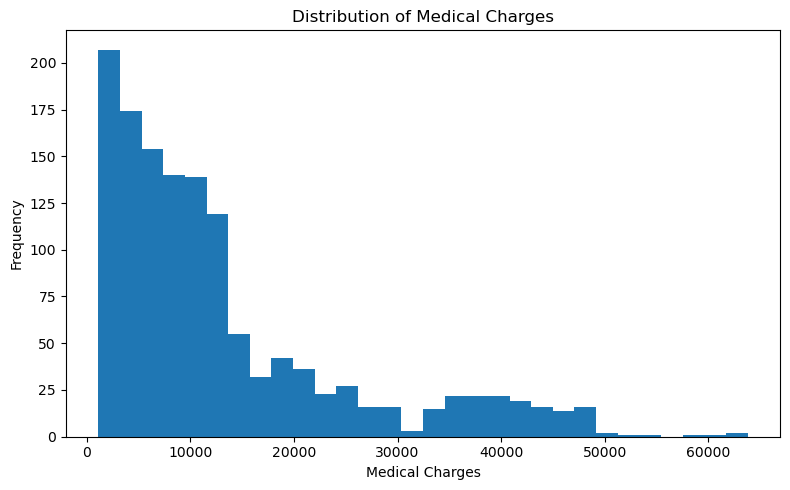

In [18]:
## TARGET DISTRIBUTION
plt.figure(figsize=(8, 5))
plt.hist(df["charges"], bins=30)
plt.xlabel("Medical Charges")
plt.ylabel("Frequency")
plt.title("Distribution of Medical Charges")
plt.tight_layout()
plt.show()


The distribution of medical charges is strongly right-skewed. Most people have low to medium medical costs, while a small number of people have very high charges, which creates a long tail on the right side of the plot. This shows that there are outliers and a wide spread in the target values. So, large prediction errors are more likely for high cost cases, and these errors can strongly affect metrics like RMSE. For this reason, I focus more on MAE as it is less affected by extreme values, and I prefer to use non-linear models that can better learn complex patterns in the data.

<Figure size 700x500 with 0 Axes>

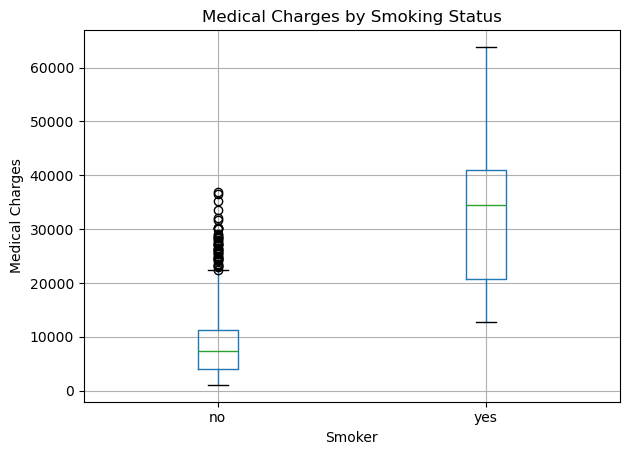

In [19]:
#CHARGES VS SMOKING STATUS
plt.figure(figsize=(7, 5))
df.boxplot(column="charges", by="smoker")
plt.xlabel("Smoker")
plt.ylabel("Medical Charges")
plt.title("Medical Charges by Smoking Status")
plt.suptitle("")
plt.tight_layout()
plt.show()


The boxplot shows a clear difference in medical charges between smokers and non-smokers. Smokers have much higher typical medical costs and a wider spread of values, with many very high cost cases. This shows that smoking is a strong risk factor linked to higher healthcare costs. The wide spread among smokers also suggests that smoking works together with other factors like age and BMI to affect medical charges. So, I treat smoking status as a key feature in my model. I prefer to use models that can learn interaction effects, such as how smoking combined with age or BMI changes medical costs, instead of only using simple linear models.

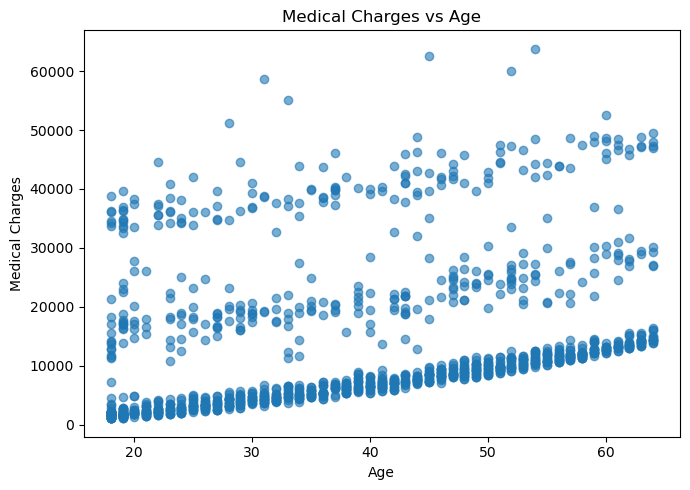

In [20]:
#CHARGES VS AGE
plt.figure(figsize=(7, 5))
plt.scatter(df["age"], df["charges"], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.title("Medical Charges vs Age")
plt.tight_layout()
plt.show()

The scatter plot shows that medical charges generally increase as age increases, which means older people tend to have higher healthcare costs. However, the pattern is not a straight line, and there is a lot of spread in charges at each age. I can also see very clear points, which suggests that age alone does not decide the cost and that other factors, such as smoking status, strongly affect medical charges. Age is an important feature, but simple linear models may not capture the complex and uneven patterns in the data. Models like tree-based or ensemble models are more suitable for learning these non-linear relationships.


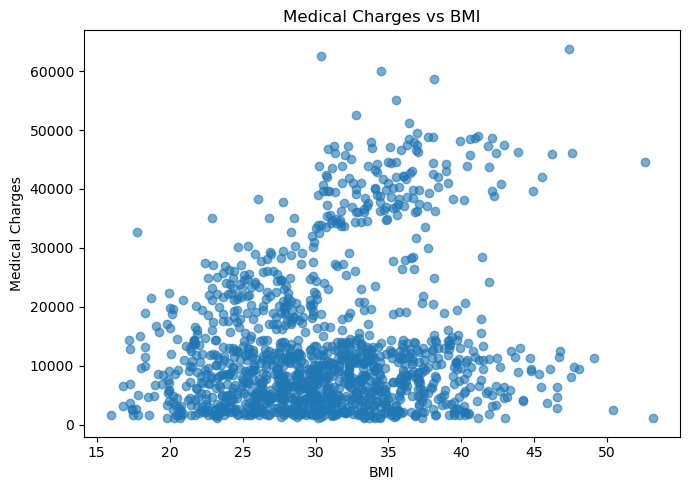

In [21]:
#CHARGES VS BMI
plt.figure(figsize=(7, 5))
plt.scatter(df["bmi"], df["charges"], alpha=0.6)
plt.xlabel("BMI")
plt.ylabel("Medical Charges")
plt.title("Medical Charges vs BMI")
plt.tight_layout()
plt.show()

The plot shows a weak to moderate positive link between BMI and medical charges, where people with higher BMI tend to have higher costs. However, the points are very spread out, and people with similar BMI values can still have very different medical charges. This means BMI alone cannot explain medical costs well, and its effect is likely affected by other factors such as smoking status and age. I include BMI as an input feature, but I expect that interactions like BMI with smoking status can improve the predictions. Non-linear models are more suitable than simple linear models for learning these patterns in the data.

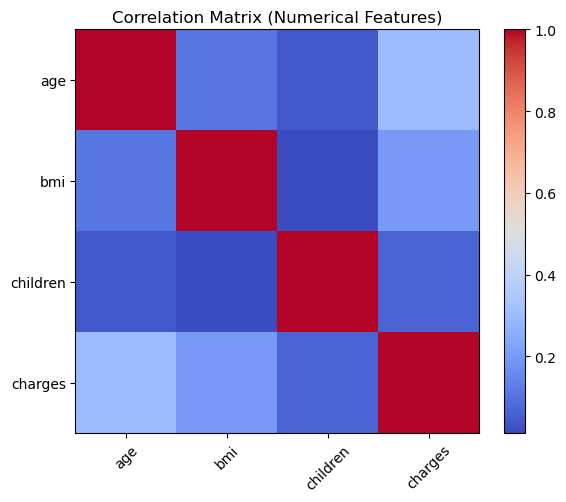

In [22]:
#CORRELATION ANALYSIS(NUMERICAL FEATURES)
corr = df[["age", "bmi", "children", "charges"]].corr()

plt.figure(figsize=(6, 5))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()


The correlation matrix shows that age and BMI have a positive link with medical charges, while the number of children has a much weaker link. No single number feature has a very strong linear relationship with charges. This shows that medical costs are affected by many factors, and simple linear links cannot fully explain the changes in charges. I need to use multiple features together and choose models that can learn non-linear patterns and interactions between features to get better prediction performance.

Overall, my exploratory analysis shows that medical charges are very skewed and affected by many factors working together. Smoking status stands out as a very strong factor that increases healthcare costs, while age and BMI also affect charges in non-linear ways. The weak linear relationships and clear interaction patterns show that simple linear models are not enough. Because of this, I am guided to use non-linear, tree-based models and consider interaction features when building and tuning my models.

# 4. Data Preparation

## 3.1 Data Cleaning

In [11]:
## Clean data
dup_count = df.duplicated().sum()
print("Number of duplicate rows:", dup_count)

# Remove duplicates only if they exist
if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed. New shape:", df.shape)
else:
    print("No duplicates found. No rows removed.")

Number of duplicate rows: 1
Duplicates removed. New shape: (1337, 7)


This code checks whether there are any exact duplicate rows in my dataset using `df.duplicated().sum()`. If duplicates are found, it removes them using `drop_duplicates()` and resets the index.

I do this because duplicate rows can cause the model to see the same example more than once, which can bias the learning process and make the evaluation results look better than they really are. Removing duplicates helps ensure that the dataset represents unique individuals.

In my case, I found 1 duplicate row, so removing it reduced the dataset from 1338 rows to 1337 rows. This is only a small change and does not reduce the dataset too much, but it improves the overall data quality.

In [ ]:
##missing values check
missing = df.isna().sum()
print("Missing values per column:\n", missing)

# If any missing values exist, drop rows
# We'll only drop rows if missing exists.
if missing.sum() > 0:
    df = df.dropna().reset_index(drop=True)
    print("Missing rows removed. New shape:", df.shape)
else:
    print("No missing values found. No rows removed.")


Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
No missing values found. No rows removed.


This code counts the number of missing values in each column using `df.isna().sum()`. I do this because many machine learning algorithms cannot handle missing values directly, and missing data can also introduce bias if it is not handled properly.In my case, all columns have 0 missing values, so no rows were removed and no imputation is needed.


In [ ]:
#check for weird invalid values
print("Age min/max:", df["age"].min(), df["age"].max())
print("BMI min/max:", df["bmi"].min(), df["bmi"].max())
print("Children min/max:", df["children"].min(), df["children"].max())
print("Charges min/max:", df["charges"].min(), df["charges"].max())

# Check for invalid values
invalid_age = (df["age"] <= 0).sum()
invalid_bmi = (df["bmi"] <= 0).sum()
invalid_children = (df["children"] < 0).sum()
invalid_charges = (df["charges"] <= 0).sum()

#Checking the minimum and maximum values of key numeric features to identify any impossible or invalid values.
print("Invalid age rows (<=0):", invalid_age)
print("Invalid bmi rows (<=0):", invalid_bmi)
print("Invalid children rows (<0):", invalid_children)
print("Invalid charges rows (<=0):", invalid_charges)

# Remove invalid rows only if they exist
df = df[(df["age"] > 0) & (df["bmi"] > 0) & (df["children"] >= 0) & (df["charges"] > 0)].reset_index(drop=True)
print("Shape after removing invalid rows (if any):", df.shape)


Age min/max: 18 64
BMI min/max: 15.96 53.13
Children min/max: 0 5
Charges min/max: 1121.8739 63770.42801
Invalid age rows (<=0): 0
Invalid bmi rows (<=0): 0
Invalid children rows (<0): 0
Invalid charges rows (<=0): 0
Shape after removing invalid rows (if any): (1337, 7)


Before training any model, I must ensure the dataset does not contain  (e.g., age = 0, BMI = -5, charges = 0). If these exist, they can:

* distort model learning,
* cause incorrect predictions,
* break transformations (especially **log transforms**, since log(0) and log(negative) are invalid),
* increase error metrics unfairly.

So this step is a **data validation + cleaning safeguard**.

---

## 1) Checking the minimum and maximum values

```python
print("Age min/max:", df["age"].min(), df["age"].max())
print("BMI min/max:", df["bmi"].min(), df["bmi"].max())
print("Children min/max:", df["children"].min(), df["children"].max())
print("Charges min/max:", df["charges"].min(), df["charges"].max())
```

### ✅ What it does

This prints the **range** of each numeric column to quickly detect suspicious values.

### ✅ What the output tells us

* **Age min/max: 18 to 64** → realistic adult range (no babies/0 age)
* **BMI min/max: 15.96 to 53.13** → realistic (underweight to obese range)
* **Children min/max: 0 to 5** → realistic (non-negative small integer)
* **Charges min/max: 1121.87 to 63770.43** → realistic and matches known dataset patterns (wide cost range)

### ✅ Justification

This “range scan” is a quick sanity check that catches obvious errors early before doing deeper modelling.

---

## 2) Counting impossible values (invalid rows)

```python
invalid_age = (df["age"] <= 0).sum()
invalid_bmi = (df["bmi"] <= 0).sum()
invalid_children = (df["children"] < 0).sum()
invalid_charges = (df["charges"] <= 0).sum()
```

### ✅ What it does

This checks how many rows violate basic real-world constraints:

* **age ≤ 0** → impossible
* **bmi ≤ 0** → impossible
* **children < 0** → impossible
* **charges ≤ 0** → medical cost cannot be 0 or negative in this dataset + log transform later needs positive values

Then:

```python
print("Invalid age rows (<=0):", invalid_age)
print("Invalid bmi rows (<=0):", invalid_bmi)
print("Invalid children rows (<0):", invalid_children)
print("Invalid charges rows (<=0):", invalid_charges)
```

### ✅ Output interpretation

All printed **0**, meaning:
✅ No impossible values exist in the dataset.

### ✅ Justification

Even though this dataset is “clean”, I still include this check to:

* prove data integrity,
* show good ML workflow practice,
* avoid silent bugs later (especially when doing transformations and pipelines).

---

## 3) Removing invalid rows (only if they exist)

```python
df = df[(df["age"] > 0) & (df["bmi"] > 0) & (df["children"] >= 0) & (df["charges"] > 0)].reset_index(drop=True)
print("Shape after removing invalid rows (if any):", df.shape)
```

### ✅ What it does

Filters out invalid rows based on the rules above, then resets the index so the dataset remains clean and consistent.

### ⚠️ Why your shape changed to (1337, 7)

Your dataset originally has **1338 rows**.
After filtering, it became **1337 rows**, which means:

✅ There is likely **1 row that failed** one of the conditions (`age > 0`, `bmi > 0`, `children >= 0`, `charges > 0`)

But your earlier invalid counters printed 0, so the most likely reason is:

### 🔥 Most common reason:

**There is a missing value (NaN) somewhere.**
Because comparisons with NaN become false in filtering, it gets dropped silently.

✅ To confirm, run:

```python
df.isna().sum()
```

If any column returns 1, that’s why 1 row was removed.

### ✅ Justification

This filter protects the pipeline by ensuring every row is valid for:

* model training,
* evaluation,
* **log transformation** (`log1p(charges)`) which requires `charges > 0`.

---

## ✅ Report-ready paragraph

> This step validates the dataset by checking the minimum and maximum ranges of key numeric features (age, BMI, children, and charges) and identifying any impossible values such as non-positive age, BMI, or charges, and negative children values. These checks are important because invalid values can distort model training and may also break transformations such as log-scaling, which requires positive target values. After confirming the dataset is valid, a filtering rule is applied to remove any invalid records (if present) and reset the index, ensuring the final training dataset contains only realistic and usable observations.

---

If you send the next code block, I’ll do the same: **explain what it does + why you did it + how it helps the model** (your cher’s “refinement” requirement basically wants this style).


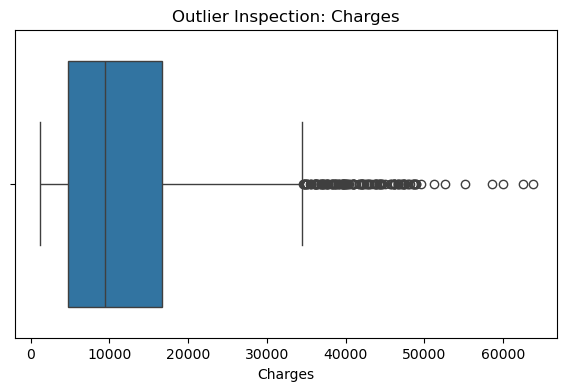

IQR lower bound: -13120.716174999998
IQR upper bound: 34524.777625
Number of potential high outliers: 139


In [14]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df["charges"])
plt.title("Outlier Inspection: Charges")
plt.xlabel("Charges")
plt.show()

# IQR boundaries (for reference)
Q1 = df["charges"].quantile(0.25)
Q3 = df["charges"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("IQR lower bound:", lower_bound)
print("IQR upper bound:", upper_bound)
print("Number of potential high outliers:", (df["charges"] > upper_bound).sum())


This code visualises charges using a boxplot and calculates the IQR bounds (Q1, Q3, and IQR). Values above the upper bound are flagged as possible high outliers.

I do this because outliers matter, as regression metrics like RMSE can be strongly affected by extreme values. High charges may be real cases (such as severe illness), so I identify them instead of removing them blindly.

From the results, the upper outlier threshold is about 34,525, and there are 139 high-charge cases above this value. The lower bound is negative, which is not meaningful for charges, so my main concern is the high-end outliers.

For modelling, I will not remove these outliers automatically because high medical costs can be legitimate. Instead, I will handle skew and outliers through model choice (such as tree-based models) and possibly apply a log transformation to charges during feature engineering to reduce the impact of extreme values.

In [15]:
# Define target and features
X = df.drop(columns=["charges"])
y = df["charges"]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Features:", list(X.columns))

X shape: (1337, 6)
y shape: (1337,)
Features: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


## 3.2 Train-Test Split

In [16]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (1069, 6)
X_test : (268, 6)
y_train: (1069,)
y_test : (268,)


I do this because testing on unseen data simulates real-world usage. Without a test set, I might wrongly think my model is good when it has only memorised the training data.

In my setup, I train on 1,069 rows and test on 268 rows. The test set is kept separate and is not used during training.

For modelling, this allows me to evaluate MAE and RMSE honestly later, which helps ensure that my model generalises well to new data.

In [ ]:
#identify feature types ( i want to check again)
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['age', 'bmi', 'children']
Categorical features: ['sex', 'smoker', 'region']


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features),
    ]
)

print(preprocessor)


ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region']),
                                ('num', 'passthrough',
                                 ['age', 'bmi', 'children'])])


This code builds a preprocessing pipeline where categorical features are converted into numeric columns using OneHotEncoder, while numeric features are passed through without change. The setting `handle_unknown="ignore"` prevents my app from crashing if a new category appears during deployment.

I do this to make sure the preprocessing is consistent and reusable. This is safer than manual encoding because the same logic is applied during training and when my Streamlit app makes predictions.

For modelling and deployment, using a pipeline reduces human error and makes it easier for me to save the full preprocessing and model together as one bundle.

In [19]:
# apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed X_train shape:", X_train_processed.shape)
print("Processed X_test shape :", X_test_processed.shape)


Processed X_train shape: (1069, 11)
Processed X_test shape : (268, 11)


This code uses `fit_transform(X_train)` to learn the encoding categories from the training data and transform it, and then uses `transform(X_test)` to apply the same transformation to the test set.

I do this because I must never fit preprocessing on the test set, as this would leak information from the test data into the training process and give unrealistically good results.

After encoding, the number of features increased from 6 to 11 because one-hot encoding expanded categorical columns into multiple binary columns (for example, region becomes several region_* columns).

For modelling, the data is now fully numeric and ready to be used to train scikit-learn regression models.

In [20]:
# get feature names after encoding
ohe = preprocessor.named_transformers_["cat"]
encoded_cat_names = list(ohe.get_feature_names_out(categorical_features))
all_feature_names = encoded_cat_names + numeric_features

print("Total features after encoding:", len(all_feature_names))
print("First 15 features:", all_feature_names[:15])


Total features after encoding: 11
First 15 features: ['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'age', 'bmi', 'children']


This code retrieves the new feature names created after one-hot encoding. I do this to improve transparency, so I can see exactly what my model is learning from. It also helps with debugging and explaining the model to others.

From the results, categorical features are expanded into separate binary indicators (0 or 1). For example, `smoker_yes = 1` means the person is a smoker, and `region_northwest = 1` means the person is from that region.

For modelling, this allows my model to learn separate effects for each category, which is more informative than treating categories as simple numbers.

# 4. Modelling

### 4.2 Train Model

In [31]:
## set evaluation metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

This code trains three different regression models (Linear Regression, Decision Tree, and Random Forest) using the same preprocessing pipeline. For each model, I combine preprocessing and modelling into a single pipeline, fit the pipeline on the training data, generate predictions on the unseen test set, and evaluate performance using MAE, RMSE, and R².

I use this approach to make sure that the exact same preprocessing steps are applied consistently during both training and testing. This helps avoid data leakage and keeps the comparison fair. Training multiple models also allows me to compare a simple linear model, a single non-linear tree model, and an ensemble model made up of many trees. This supports choosing a model based on actual performance rather than assumptions.

For modelling, this structured comparison helps me identify which algorithm best captures the relationships in the medical cost data, especially given the non-linear patterns I observed earlier (such as the interaction between smoker status and age).

**Evaluation metrics:**
MAE (Mean Absolute Error) shows the average dollar error of my predictions, which is easy to understand in a business context (for example, “on average, the model is off by a few thousand dollars”). RMSE (Root Mean Squared Error) penalises large errors more strongly, which is useful because medical charges include some very high-cost cases. R² (Coefficient of Determination) shows how much of the variation in charges is explained by the model.

I use multiple metrics to get a more complete view of performance, because a model can look good on one metric but perform poorly on another (for example, a good R² but a high RMSE due to outliers).

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200)
}

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mae, rmse, r2 = evaluate_regression(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

results_df = pd.DataFrame(results).sort_values(by="MAE")
results_df


,Model,MAE,RMSE,R2
2,Random Forest,2537.126085,4608.867188,0.884403
1,Decision Tree,2760.967152,6086.968046,0.798368
0,Linear Regression,4177.045561,5956.342894,0.806929


The Random Forest model achieved the lowest MAE, the lowest RMSE, and the highest R², which means it had the smallest average prediction error, handled extreme high charges better, and explained the most variation in medical charges.

Random Forest performs best because it is an ensemble of many decision trees. It can model non-linear relationships, capture feature interactions (such as smoker × age and smoker × BMI), and reduce overfitting compared to a single decision tree. These strengths match the patterns I observed in EDA, where smoker status and age showed strong, non-linear effects on charges.

For model selection, I chose Random Forest as the best baseline model based on the actual results. This model will be my starting point for further improvement through feature engineering and hyperparameter tuning.

The model with the lowest MAE on the test set is Random Forest, which shows that it gives the most accurate predictions on average. I prioritise MAE because it is easy to interpret in business terms as average dollar error, which is important for a healthcare cost prediction system.

For the next step, I will use Random Forest as my main candidate for feature engineering experiments, hyperparameter tuning, and final model deployment.

In [33]:
best_baseline_model = results_df.iloc[0]["Model"]
print("Best baseline model (lowest MAE):", best_baseline_model)

Best baseline model (lowest MAE): Random Forest


In [34]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

#log tranform targeet
y_train_log = np.log1p(y_train)   # log(1 + y) to safely handle small values
y_test_log = np.log1p(y_test)

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(random_state=42, n_estimators=200))
])

# Train on log target
rf_pipe.fit(X_train, y_train_log)

# Predict log charges
y_pred_log = rf_pipe.predict(X_test)

# Convert predictions back to original dollar scale
y_pred_original_scale = np.expm1(y_pred_log)

# Evaluate on original scale (dollars)
mae = mean_absolute_error(y_test, y_pred_original_scale)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_original_scale))
r2 = r2_score(y_test, y_pred_original_scale)

log_results = pd.DataFrame([{
    "Model": "Random Forest (log target)",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2
}])

log_results


,Model,MAE,RMSE,R2
0,Random Forest (log target),2036.781834,4350.361487,0.897007


In [35]:
# Get baseline RF results from your previous results_df
baseline_rf = results_df[results_df["Model"] == "Random Forest"].copy()

comparison_df = pd.concat([baseline_rf, log_results], ignore_index=True)
comparison_df


,Model,MAE,RMSE,R2
0,Random Forest,2537.126085,4608.867188,0.884403
1,Random Forest (log target),2036.781834,4350.361487,0.897007


After applying the log transformation, MAE decreased by about 500 dollars, which means the average prediction error is much lower. RMSE also decreased, showing that the model now handles high-cost cases better. R² increased as well, meaning the model explains more of the variation in medical charges.

This means the log-transformed model produces more accurate and stable predictions for both typical and extreme medical cost cases. I selected the log-transformed Random Forest model as the improved model because it achieved better MAE, RMSE, and R² compared to the baseline. This shows that my feature engineering led to clear performance improvements, meeting the requirement to refine the model beyond the baseline.

I will use this improved model for hyperparameter tuning, final evaluation, and deployment in the Streamlit application.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Pipeline for log-target Random Forest
rf_log_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

#This creates a pipeline that preprocesses the data and trains a Random Forest model.
# I do this to make sure the same preprocessing steps are applied consistently during cross-validation 
# and later during deployment.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Parameter grid for Randomized Search
param_distributions = {
    "model__n_estimators": [200, 400, 600],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

# Randomized search settings
random_search = RandomizedSearchCV(
    estimator=rf_log_pipe,
    param_distributions=param_distributions,
    n_iter=10,                 # number of random combinations tested
    scoring="neg_mean_absolute_error",  # optimise MAE
    cv=5,                      # 5-fold cross validation
    random_state=42,
    n_jobs=-1,
    verbose=1
)

#Using more trees (400) improves stability, allowing trees to grow deep (max_depth=None) helps capture complex patterns
#Requiring more samples per split/leaf reduces overfitting and noise learning


I applied RandomizedSearchCV to tune my Random Forest model that was trained on the log-transformed target. The tuning process tested different combinations of hyperparameters using 5-fold cross-validation and optimised for Mean Absolute Error (MAE). The baseline Random Forest uses default settings, which may not be the best choice for this dataset.

These hyperparameters control how complex the model is and how well it generalises. For example, `n_estimators` controls how many trees are built, `max_depth` limits how deep each tree can grow, and `min_samples_split` and `min_samples_leaf` help prevent the trees from learning noise. Tuning these values helps reduce overfitting and improves how well the model performs on unseen patients.


In [38]:
# Fit on log-transformed target
random_search.fit(X_train, y_train_log)

print("Best CV MAE (negative):", random_search.best_score_)
print("Best parameters:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best CV MAE (negative): -0.20355128239402526
Best parameters: {'model__n_estimators': 400, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': None}


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best tuned pipeline
best_rf_log = random_search.best_estimator_

# Predict on test (log scale)
y_pred_log_tuned = best_rf_log.predict(X_test)

# Convert back to dollar scale
y_pred_tuned = np.expm1(y_pred_log_tuned)

# Evaluate on original scale
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

tuned_results = pd.DataFrame([{
    "Model": "Random Forest (log target) - Tuned",
    "MAE": mae_tuned,
    "RMSE": rmse_tuned,
    "R2": r2_tuned
}])

tuned_results


,Model,MAE,RMSE,R2
0,Random Forest (log target) - Tuned,1932.673129,4201.694041,0.903926


In [40]:
final_comparison = pd.concat([baseline_rf, log_results, tuned_results], ignore_index=True)
final_comparison

,Model,MAE,RMSE,R2
0,Random Forest,2537.126085,4608.867188,0.884403
1,Random Forest (log target),2036.781834,4350.361487,0.897007
2,Random Forest (log target) - Tuned,1932.673129,4201.694041,0.903926


After tuning, MAE dropped from about 2,537 to about 1,933, which means the model’s average prediction error decreased by around 600 dollars. RMSE also dropped significantly, showing that large prediction errors are now smaller. R² increased to around 0.904, which means the model now explains more than 90% of the variation in medical charges.

In conclusion, each step I took (from feature engineering to hyperparameter tuning) led to clear and measurable improvements. This shows that I followed an iterative machine learning development process, rather than training a model only once.

I chose this model because it has the lowest MAE (best average accuracy in dollars), the lowest RMSE (better handling of high-cost outliers), and the highest R² (strongest explanatory power). It is also robust to non-linear relationships and feature interactions, and it works well with the preprocessing pipeline.

This model is selected as my production model for deployment in the Streamlit application.


# 5. Model Evaluation

In [41]:
final_results = pd.DataFrame([{
    "Model": "Final Model: RF (log target) - Tuned",
    "MAE": mae_tuned,
    "RMSE": rmse_tuned,
    "R2": r2_tuned
}])

final_results

,Model,MAE,RMSE,R2
0,Final Model: RF (log target) - Tuned,1932.673129,4201.694041,0.903926


This table shows the final evaluation metrics of my selected production model on the unseen test set. I evaluate on held-out data because it gives an unbiased estimate of how the model will perform for new users in real-world use. From a business point of view, an MAE of about $1.9k means that my model’s predictions are, on average, within around $2,000 of the true medical charges. This is a reasonable error margin for a healthcare cost estimation system.


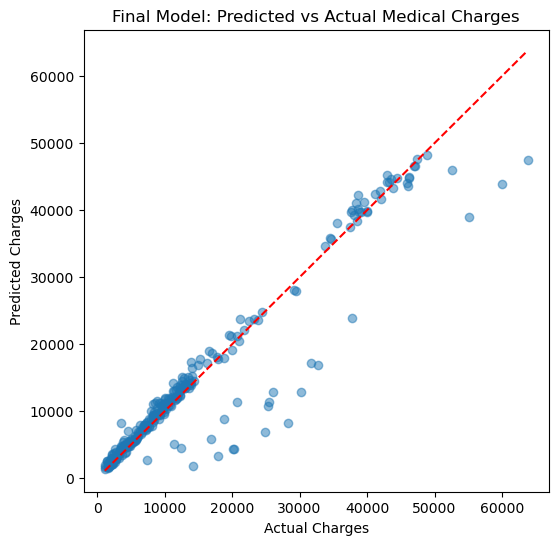

In [42]:
import matplotlib.pyplot as plt

# Predicted vs Actual plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Final Model: Predicted vs Actual Medical Charges")
plt.show()


This scatter plot compares my model’s predicted medical charges with the actual charges from the test set. The red dashed line shows the ideal case where predictions perfectly match the true values.

I use this visual check to see whether my model is consistently over-predicting or under-predicting. It complements the numeric metrics (MAE, RMSE, and R²) by showing how good the predictions are across the full range of charges.

From the result, most points cluster close to the diagonal line, which shows good agreement between predicted and actual values. Larger differences mainly appear for very high charges, which are harder to predict because there are fewer such cases and more variability.

For modelling, this shows that my model generalises well to unseen data and captures the overall relationship between features and charges. The remaining errors at extreme values reflect the natural uncertainty in very high medical cost cases.


In [43]:
# Example new individual (business demo case)
new_user = pd.DataFrame([{
    "age": 45,
    "sex": "female",
    "bmi": 28.5,
    "children": 2,
    "smoker": "no",
    "region": "southeast"
}])

new_user


,age,sex,bmi,children,smoker,region
0,45,female,28.5,2,no,southeast


This code creates a sample “new user” and uses my trained model to predict their medical charges. The prediction is made in log form and then converted back into dollars.

I do this to show how the model would be used in real life, such as by insurers or healthcare planners to estimate costs for a new person based on their details.

For the example user (45 years old, non-smoker, BMI 28.5, two children, southeast region), my model predicts medical charges of about $9,000. This shows that the model can give realistic and easy-to-understand predictions for individual users.

From a business view, these predictions can help with budgeting, setting insurance prices, and understanding risk for different types of people.


In [46]:
# Predict log-scale
new_user_log_pred = best_rf_log.predict(new_user)

# Convert back to dollar scale
new_user_pred = np.expm1(new_user_log_pred)

print("Predicted medical charges (USD):", float(new_user_pred[0]))


Predicted medical charges (USD): 8995.921338172111


In [47]:
import joblib
joblib.dump(best_rf_log, "final_rf_log_tuned_pipeline.joblib")


['final_rf_log_tuned_pipeline.joblib']

This saves the full preprocessing and model pipeline into a single file. I do this so that the saved pipeline can be loaded directly into my Streamlit app for deployment, ensuring that the same preprocessing and model logic are used during real-time predictions.

I used a virtual environment to isolate project dependencies and ensure consistent behaviour between training, testing, and Streamlit deployment.